#  문제정의
- 버섯의 특징을 사용해서 독/ 식용 버섯을 분류

## 목표
- Decision Tree 과대적합 제어/ 시각화/ 특성 선택

# 데이터 수집

In [56]:
import pandas as pd
data = pd.read_csv('./data/mushroom.csv')
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [57]:
data.shape

(8124, 23)

# 데이터 전처리 

##  결측치

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#  탐색적 데이터 분석

# 모델 선택 및 하이퍼 파라미터 튜닝

In [59]:
X = data.loc[:,'cap-shape' : ] #문제
y = data.loc[:, 'poisonous'] #정답

## 인코딩
- 글자 데이터를 수치 데이터로 변환하는 작업
- label encoding : 수치값으로 mapping하는 작업(딕셔너리 형태의 데이터를 키값을 벨류값으로 바꿔준다)
- one-hot encoding : 0 or 1 의 값을 가진 여르개의 새로운 특성으로 변경하는 작업

### label 인코딩

In [60]:
X1 = X.copy() # 새로운 주소값을 받기 때문에 x가 변해도 x1은 변하지 않는다!

In [61]:
X1['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [62]:
X1['cap-shape']

0       x
1       x
2       b
3       x
4       x
       ..
8119    k
8120    x
8121    f
8122    k
8123    x
Name: cap-shape, Length: 8124, dtype: object

In [63]:
X1['cap-shape'].map({"x":0, "f":1, "k":2, "b":3, "s":4, "c":5})

0       0
1       0
2       3
3       0
4       0
       ..
8119    2
8120    0
8121    1
8122    2
8123    0
Name: cap-shape, Length: 8124, dtype: int64

In [64]:
X1['cap-shape'] = X1['cap-shape'].map({"x":0, "f":1, "k":2, "b":3, "s":4, "c":5})

###  onehot 인코딩

In [65]:
X2 = X.copy()

In [66]:
# onehot 인코딩 할 컬럼을 뽑아서 넣어주어야 한다
X_one_hot = pd.get_dummies(X2)
X_one_hot.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


## 훈련과 평과로 데이터 분리

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y,
                                                   test_size = 0.3)

## 모델 불러오기

In [69]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

# 학습

In [70]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

# 평가

In [71]:
tree_model.score(X_train, y_train)

1.0

In [72]:
tree_model.score(X_test, y_test)

1.0

# 시각화

In [73]:
!pip install graphviz
#시각화 하기 위해서 graphviz를 인스톨

In [74]:
#환경 변수 편집
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

In [75]:
from sklearn.tree import export_graphviz
export_graphviz(tree_model, out_file='tree.dot',
               class_names=['p','e'], #정답데이터
               feature_names=X_one_hot.columns,
               impurity=True, #불순도를 표시하는 코드(true일 때는 사용한 불순도를 알려준다)
               filled=True) #색상을 채우는 코드

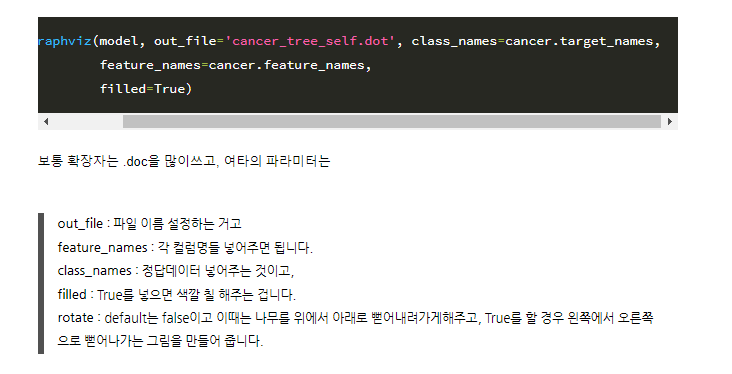

In [76]:
#참고하면 좋은 사이트
#https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=gdpresent&logNo=221717260869

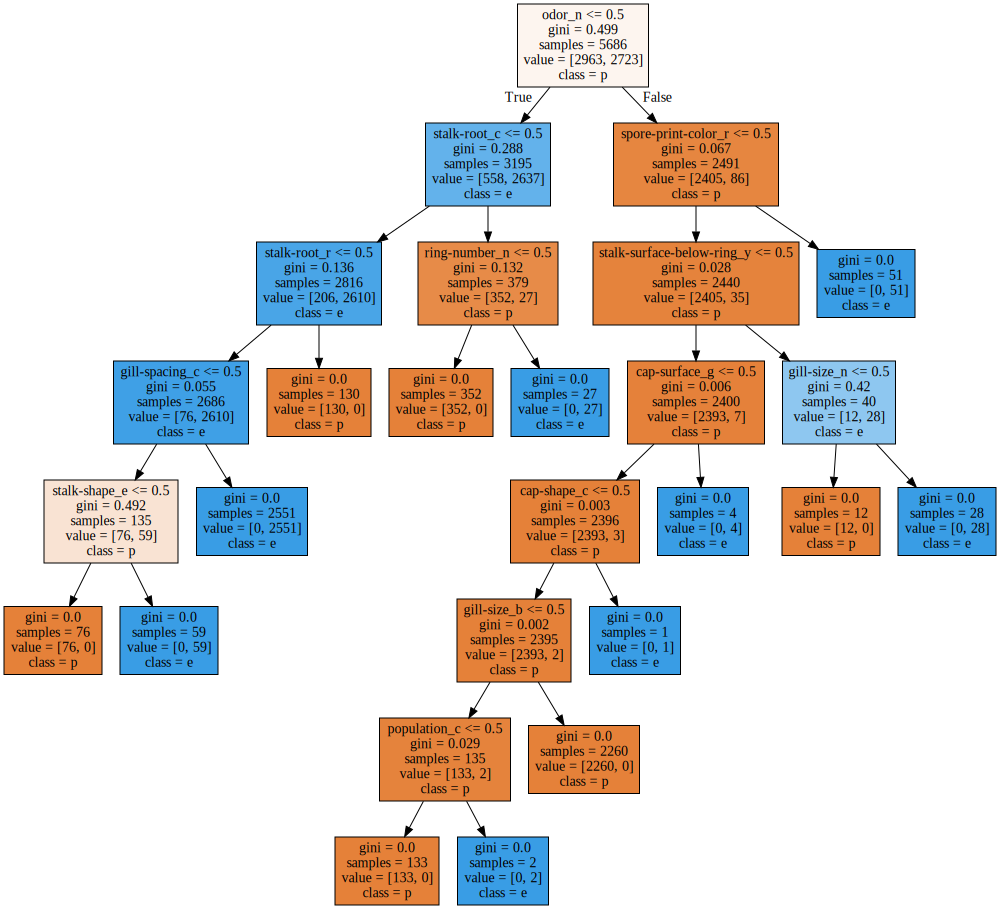

In [77]:
import graphviz

with open('tree.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

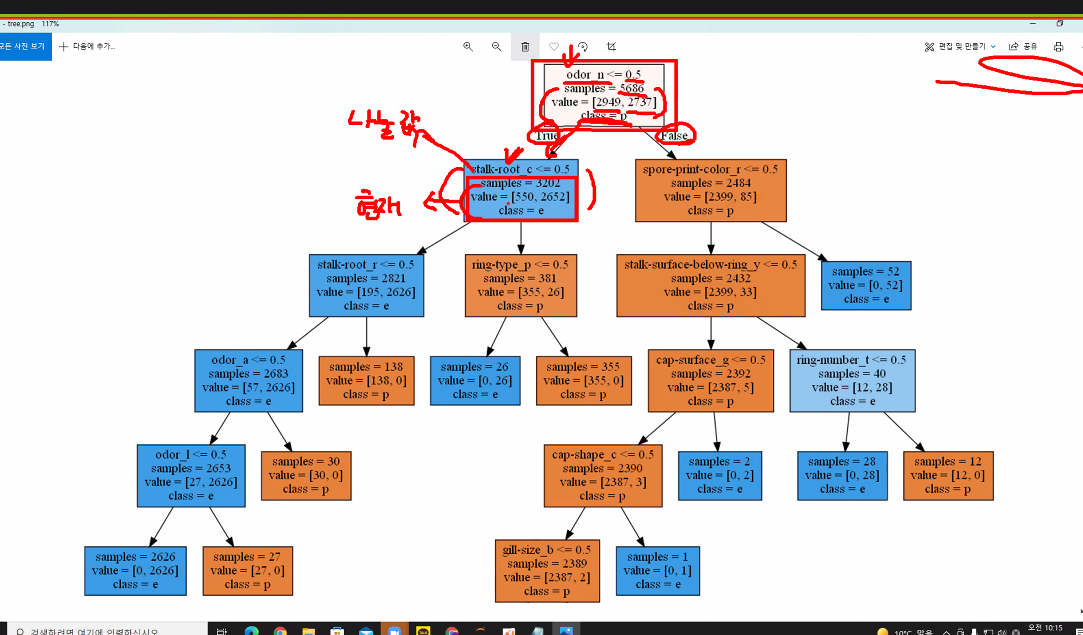

In [78]:
#sample 은 데이터 갯수
#value 는 class에 맞는 데이터 갯수를 의미
#class는 value에서 더 많은 클래스를 나타낸다
# 지니 불순도는 0에 가까울수록 데이터가 잘 나위어졌다는걸 의미한다
# 색이 짙을수록 불순도가 0에 가깝다

In [79]:
#이미지 저장
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

0

# 과대적합 제어

## leaf node 10개로 조정
- 1. leaf node의 수를 10개로 조정한 decisiontree 모델 생성
- 2. decisiontree 모델 학습
- 3. decisiontree 모델 평가
- 4. 시각화

### 모델생성

In [80]:
tree_model2 = DecisionTreeClassifier(max_leaf_nodes = 10)

### 모델학습

In [81]:
tree_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

### 모델평가

In [82]:
tree_model2.score(X_train, y_train)

0.9987689060851214

In [83]:
tree_model2.score(X_test, y_test)

0.9995898277276456

###  시각화

In [84]:
from sklearn.tree import export_graphviz
export_graphviz(tree_model2, out_file='tree.dot',
               class_names=['p','e'],
               feature_names=X_one_hot.columns,
               impurity=True, #불순도를 표시하는 코드(true일 때는 사용한 불순도를 알려준다)
               filled=True) #색상을 채우는 코드

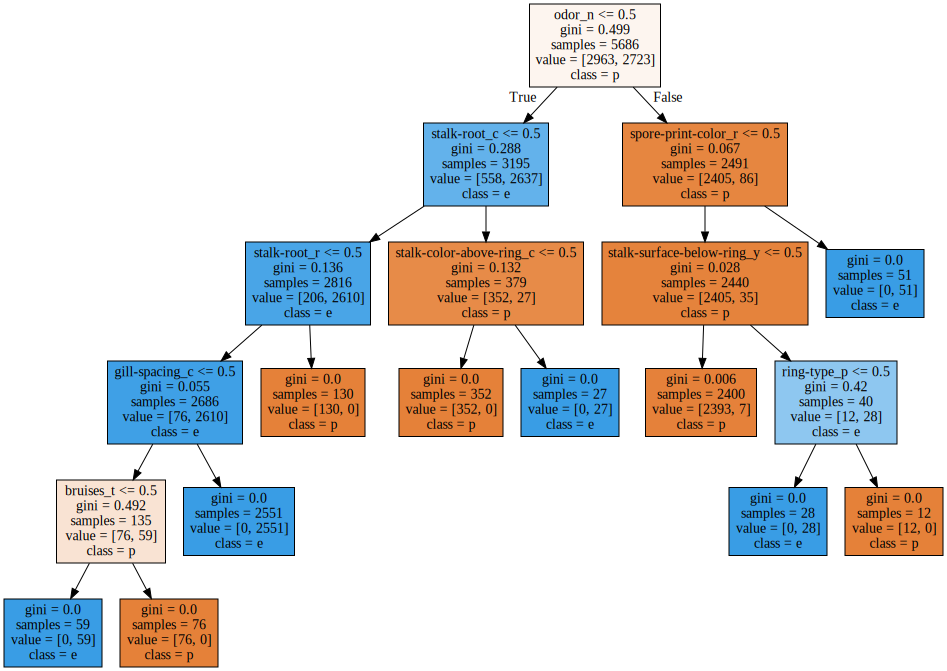

In [85]:
import graphviz

with open('tree.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [86]:
#이미지 저장
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

0

# 교차검증

In [88]:
from sklearn.model_selection import cross_val_score
#()안에는 사용할 모델, 문제 데이터, 정답 데이터, 데이터 분할 수
cross_val_score(tree_model, X_train, y_train, cv = 5).mean()
# > 교차검증을 하여 결과에 대한 신뢰도를 높일 수 있다
#cv 는 몇개로 나눌지 결정하는 값을 넣는다(주로 5 사용)

0.9998242530755711

# 특성선택

In [91]:
X_train.shape

(5686, 117)

In [90]:
# 특성의 중요도를 나타내는 값이다
# 117개의 중요도의 합은 1이다.
# 숫자가 클수록 중요도가 높다!
# 0으로 나타나 있는건 아무런 영향을 끼치지 않는 데이터라는 뜻이다.
tree_model.feature_importances_

array([0.00000000e+00, 7.03267630e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.80720996e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.16920469e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.86368621e-02, 0.00000000e+00, 1.97041047e-05,
       5.91979747e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.34077353e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.72336273e-01, 0.00000000e+00, 8.25112698e-02,
      

In [92]:
fi = tree_model.feature_importances_

In [97]:
fi_df = pd.DataFrame(fi, index = X_train.columns)
fi_df.sort_values(by = 0, ascending = False).head(10) #내림차순으로 정렬, 0 은 컬럼 이름

,0
odor_n,0.616920
stalk-root_c,0.172336
stalk-root_r,0.082511
spore-print-color_r,0.034203
gill-spacing_c,0.028637
stalk-shape_e,0.023408
ring-number_n,0.017672
stalk-surface-below-ring_y,0.013473
gill-size_n,0.005920
cap-surface_g,0.002807


## 교차검증 활용 예시

In [ ]:
tree = DecisionTreeClassifier(max_depth = 7) # >> 그리드 서치를 활용하자!
tree.fit(X_train, y_train)
cross_val_score(tree_model, X_train, y_train, cv = 5).mean()
#>> 원래 사용하던 score 보다 교차검증을 사용하자!
# 교차검증시 max_depth같은 파라미터를 조정해서 가장 좋은 값이 나왔을때
# test로 검증을 한다!

In [99]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth' : range(1,10),
    'max_leaf_nodes' : range(10,20)
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5) # 교차검증이 알아서 진행된다!
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(10, 20)})

In [100]:
grid.best_score_

0.9998242530755711

In [101]:
grid.best_params_

{'max_depth': 8, 'max_leaf_nodes': 14}